In [1]:
import pandas as pd
import os

In [2]:
import pickle

In [3]:
abstract_df = pd.read_csv('../../clean_data/all_abstract.csv', index_col=0)

In [6]:
abstract = abstract_df.copy()

In [7]:
abstract_text_vectors = abstract[['goal_name_key_pos', 'abstract', 'subject', 'certain']]
abstract_features = abstract.drop(columns=['goal_first_step', 'default_goal_type', 'goal_domain_key_pos', 'goal_name_key_pos'])

In [8]:
from sklearn.model_selection import train_test_split

#### Features approach

In [9]:
subject_features = abstract_features.drop(columns=['abstract', 'certain'])

In [10]:
X = subject_features.drop('subject', axis=1)
y = subject_features['subject']

In [11]:
X.shape

(17118, 13)

In [12]:
y.shape

(17118,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,is_questioned,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,goal_weight,goal_words,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,goal_aver_word_len
11336,0,0,0,0,1,1.0034,2,0,2,0,0,0,10.00
1786,0,1,1,1,0,0.0065,2,0,1,0,1,0,11.00
2008,0,1,0,1,0,0.0082,1,0,1,0,0,0,14.00
17498,1,1,0,1,1,0.0055,3,1,1,0,1,0,10.33
4958,0,1,0,1,1,0.0375,3,0,3,0,0,0,8.33


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mms = MinMaxScaler()

In [17]:
X_train_scaled = mms.fit_transform(X_train)

In [18]:
# X_train_scaled

In [19]:
X_test_scaled = mms.fit_transform(X_test)

In [20]:
from xgboost import XGBClassifier

In [21]:
abstract_subj_xgb = XGBClassifier()

In [22]:
abstract_subj_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred = abstract_subj_xgb.predict(X_test_scaled)

In [24]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      2148
           1       0.38      0.23      0.29      1276

    accuracy                           0.57      3424
   macro avg       0.51      0.51      0.49      3424
weighted avg       0.54      0.57      0.55      3424



In [26]:
accuracy_score(y_test, y_pred)

0.5747663551401869

In [27]:
f1_score(y_test, y_pred)

0.290448343079922

In [28]:
roc_auc_score(y_test, y_pred)

0.50550486564742

In [111]:
with open('models/abstract_subject_feat_xgb.pkl', 'wb') as f:
    pickle.dump(abstract_subj_xgb, f)

#### Vectors approach

In [29]:
subject_vectors = abstract_text_vectors.drop(columns=['abstract', 'certain'])

In [30]:
subject_vectors.dropna(inplace=True)

In [31]:
subject_vectors.columns

Index(['goal_name_key_pos', 'subject'], dtype='object')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
text = subject_vectors['goal_name_key_pos']
y = subject_vectors['subject']

In [34]:
text

0                              отстать поезд современность
1                                           самореализация
2                                              образ жизнь
3                         обновление устаревший информация
4                          повышение результативность труд
                               ...                        
18013    приобретение новый знание навык успешный обуче...
18014                             быть нужный работодатель
18016                                   сохранить здоровье
18018                                  зарабатывать деньга
18019                                      получение навык
Name: goal_name_key_pos, Length: 16953, dtype: object

In [35]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [36]:
X.shape

(16953, 4600)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [38]:
X_train

<13562x4600 sparse matrix of type '<class 'numpy.float64'>'
	with 47195 stored elements in Compressed Sparse Row format>

In [39]:
abstract_subj_v_xgb = XGBClassifier()

In [40]:
abstract_subj_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = abstract_subj_v_xgb.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      2138
           1       0.32      0.06      0.10      1253

    accuracy                           0.61      3391
   macro avg       0.47      0.49      0.42      3391
weighted avg       0.51      0.61      0.51      3391



In [43]:
accuracy_score(y_test, y_pred)

0.6054261279858448

In [44]:
f1_score(y_test, y_pred)

0.10201342281879196

In [45]:
roc_auc_score(y_test, y_pred)

0.49267520345931226

In [127]:
with open('models/abstract_subject_vect_xgb.pkl', 'wb') as f:
    pickle.dump(abstract_subj_v_xgb, f)

#### Neural net approach

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [47]:
text = subject_vectors['goal_name_key_pos']
y = subject_vectors['subject']

In [48]:
token = Tokenizer()
token.fit_on_texts(text)

In [49]:
vocab_size = len(token.word_index) + 1
vocab_size

4619

In [50]:
# print(token.word_index)

In [51]:
encoded_text = token.texts_to_sequences(text)

In [52]:
# print(encoded_text)

In [53]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

127

In [54]:
max_length = 127
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [55]:
X.shape

(16953, 127)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [57]:
vec_size = 127

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [58]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 46.9 ms


In [59]:
import numpy as np

In [60]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [63]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13562 samples, validate on 3391 samples
Epoch 1/600
13562/13562 [==============================] - 9s 698us/sample - loss: 0.6610 - accuracy: 0.6307 - val_loss: 0.6751 - val_accuracy: 0.6305
Epoch 2/600
13562/13562 [==============================] - 9s 686us/sample - loss: 0.6594 - accuracy: 0.6307 - val_loss: 0.6697 - val_accuracy: 0.6305
Epoch 3/600
13562/13562 [==============================] - 9s 663us/sample - loss: 0.6593 - accuracy: 0.6305 - val_loss: 0.6712 - val_accuracy: 0.6305
Epoch 4/600
13562/13562 [==============================] - 9s 648us/sample - loss: 0.6547 - accuracy: 0.6307 - val_loss: 0.6693 - val_accuracy: 0.6284
Epoch 5/600
13562/13562 [==============================] - 9s 640us/sample - loss: 0.6494 - accuracy: 0.6289 - val_loss: 0.6706 - val_accuracy: 0.6272
Epoch 6/600
13562/13562 [==============================] - 8s 620us/sample - loss: 0.6350 - accuracy: 0.6387 - val_loss: 0.6766 - val_accuracy: 0.6087
Epoch 7/600
13562/13562 [====================

In [64]:
losses = pd.DataFrame(model.history.history)

In [65]:
losses[['accuracy','val_accuracy']].plot()

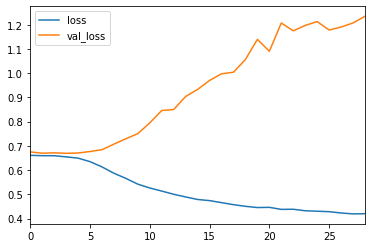

In [66]:
losses[['loss','val_loss']].plot()

In [67]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.2349059901136243, 0.600118]


In [68]:
y_pred = model.predict_classes(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      2138
           1       0.39      0.15      0.21      1253

    accuracy                           0.60      3391
   macro avg       0.51      0.51      0.47      3391
weighted avg       0.54      0.60      0.54      3391



In [70]:
accuracy_score(y_test, y_pred)

0.6001179593040401

In [71]:
f1_score(y_test, y_pred)

0.21436848203939748

In [72]:
roc_auc_score(y_test, y_pred)

0.5064701591764424

In [155]:
model.save("models/abstract_subject_vect_nn.h5")